<a href="https://colab.research.google.com/github/Noelia2025/s8l1/blob/main/DEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
# Descargar última versión
path = kagglehub.dataset_download("doanquanvietnamca/liar-dataset")
print("Path to dataset files:", path)

columns = [
    "id",
    "label",
    "statement",
    "subject",
    "speaker",
    "speaker_job",
    "state",
    "party",
    "barely_true_counts",
    "false_counts",
    "half_true_counts",
    "mostly_false_counts",
    "mostly_true_counts",
    "pants_on_fire_counts",
    "context"
]

train_path = os.path.join(path, "train.tsv")
test_path = os.path.join(path, "test.tsv")
valid_path = os.path.join(path, "valid.tsv")

train = pd.read_csv(train_path, sep="\t", header=None, names=columns, quoting=3)
test = pd.read_csv(test_path, sep="\t", header=None, names=columns, quoting=3)
valid = pd.read_csv(valid_path, sep="\t", header=None, names=columns, quoting=3)



Using Colab cache for faster access to the 'liar-dataset' dataset.
Path to dataset files: /kaggle/input/liar-dataset


In [ ]:
#valores numéricos para regresión
label_map = {
    "pants-fire": 0,
    "false": 1,
    "barely-true": 2,
    "half-true": 3,
    "mostly-true": 4,
    "true": 5
}

train["target"] = train["label"].map(label_map)
valid["target"] = valid["label"].map(label_map)
test["target"] = test["label"].map(label_map)

In [54]:
X_train = train["statement"]
y_train = train["target"]

X_valid = valid["statement"]
y_valid = valid["target"]

X_test = test["statement"]
y_test = test["target"]

print(train["label"].value_counts())
print(train["target"].value_counts())

label
half-true      2123
false          1998
mostly-true    1966
true           1683
barely-true    1657
pants-fire      842
Name: count, dtype: int64
target
3    2123
1    1998
4    1966
5    1683
2    1657
0     842
Name: count, dtype: int64


Análisis exploratorio

 INFORMACIÓN BÁSICA DEL DATASET 
Número de instancias y variables: (10269, 17)

Tipos de datos de cada columna:
id                       object
label                    object
statement                object
subject                  object
speaker                  object
speaker_job              object
state                    object
party                    object
barely_true_counts        int64
false_counts              int64
half_true_counts          int64
mostly_false_counts       int64
mostly_true_counts        int64
pants_on_fire_counts     object
context                 float64
target                    int64
len                       int64
dtype: object

Estadísticas descriptivas de conteos de veracidad:
       barely_true_counts  false_counts  half_true_counts  \
count        10269.000000  10269.000000      10269.000000   
mean            11.560132     13.313857         17.195637   
std             19.006447     24.140583         35.948211   
min              0.000000      0.0

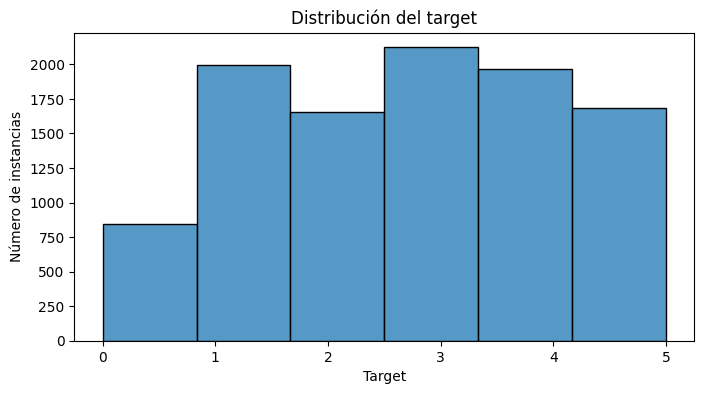


HISTOGRAMA DE LONGITUD DE LOS TEXTOS
Muestra cuántas palabras tienen los statements.


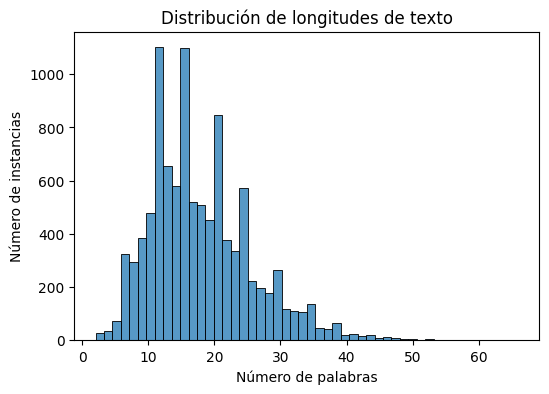


--- BOXPLOT DE LONGITUD DE TEXTOS POR TARGET ---
Permite comparar la longitud de los statements según la clase del target.


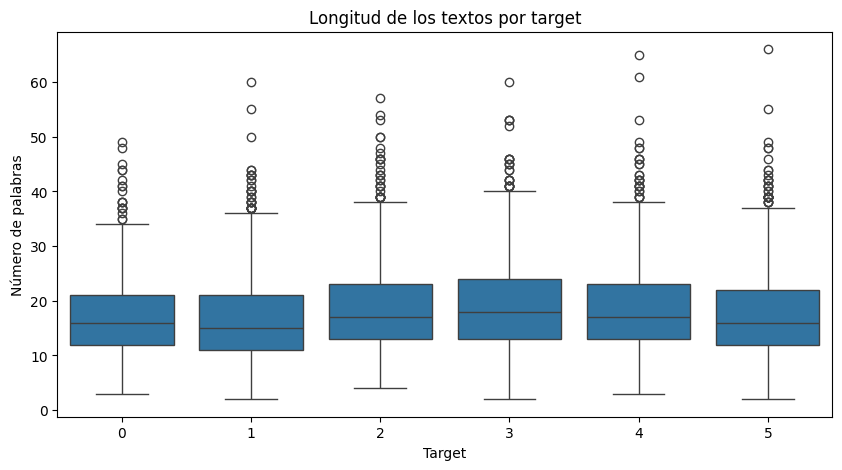


--- NUBES DE PALABRAS POR TARGET ---
Cada nube muestra las palabras más frecuentes para cada clase del target.

Mostrando nube de palabras para Target: 0


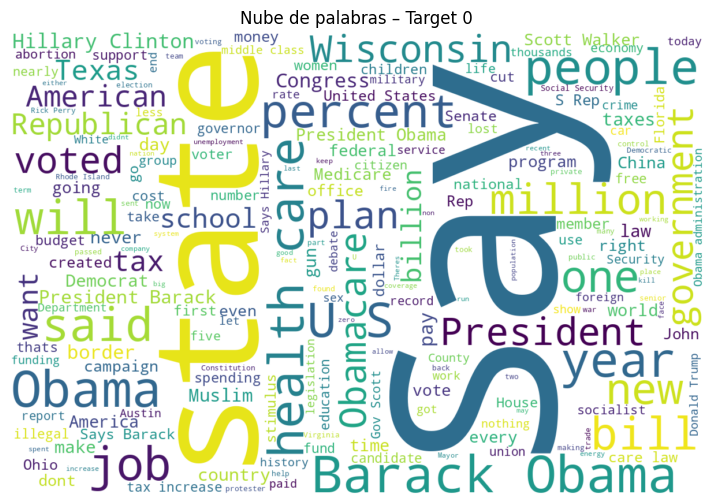


Mostrando nube de palabras para Target: 1


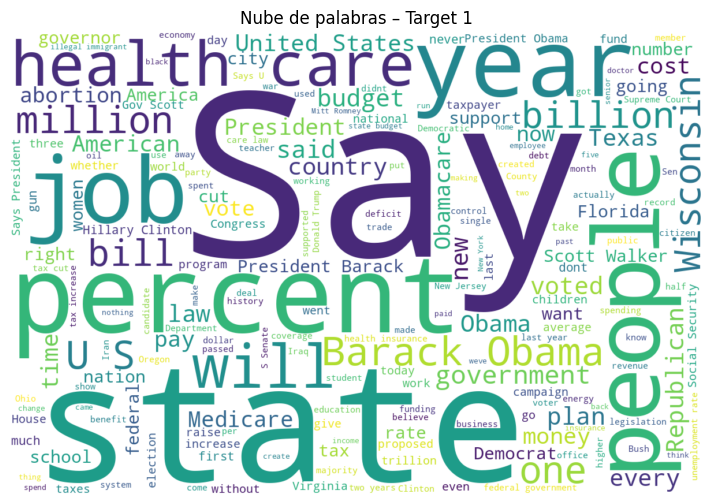


Mostrando nube de palabras para Target: 2


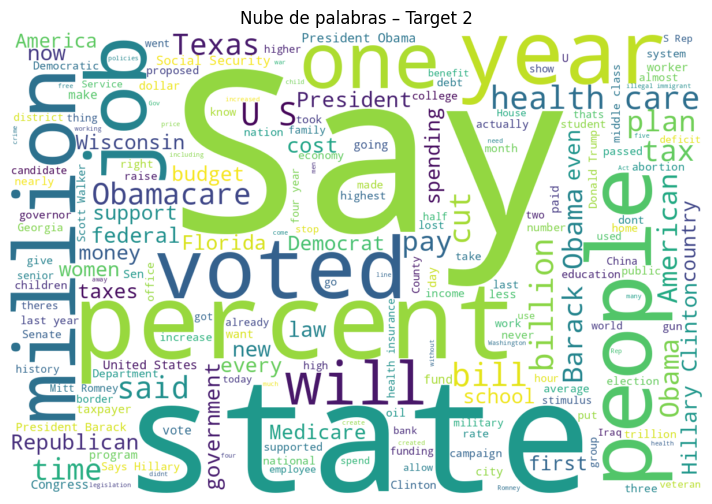


Mostrando nube de palabras para Target: 3


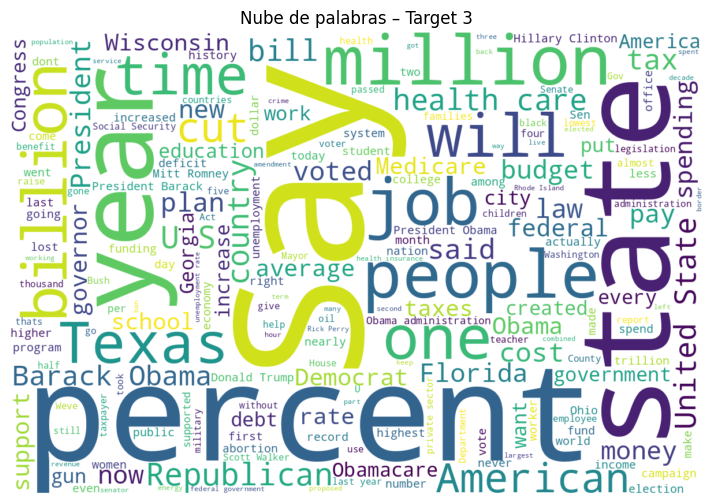


Mostrando nube de palabras para Target: 4


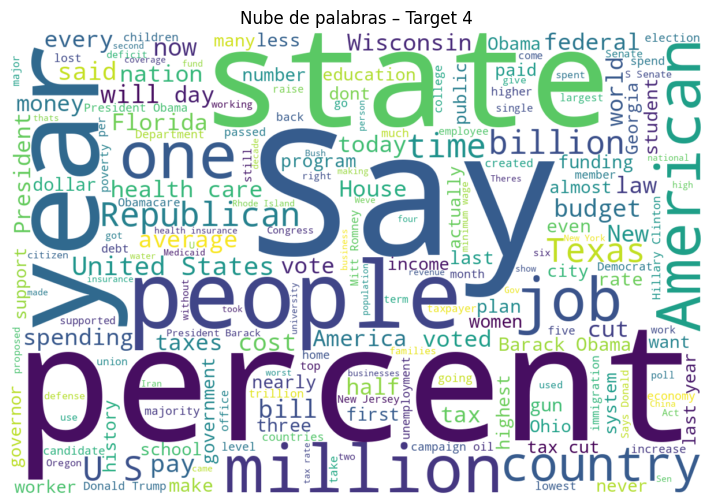


Mostrando nube de palabras para Target: 5


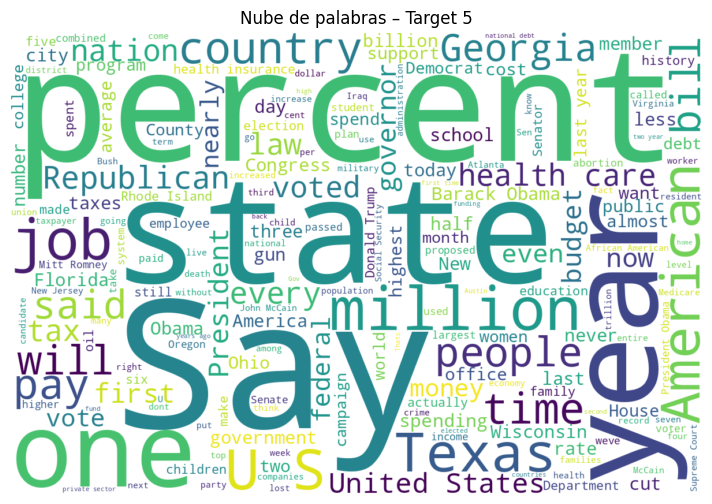


--- TOP 20 PALABRAS MÁS FRECUENTES POR TARGET ---
Estos gráficos muestran las 20 palabras más repetidas por cada clase del target.

Mostrando top 20 palabras para Target: 0


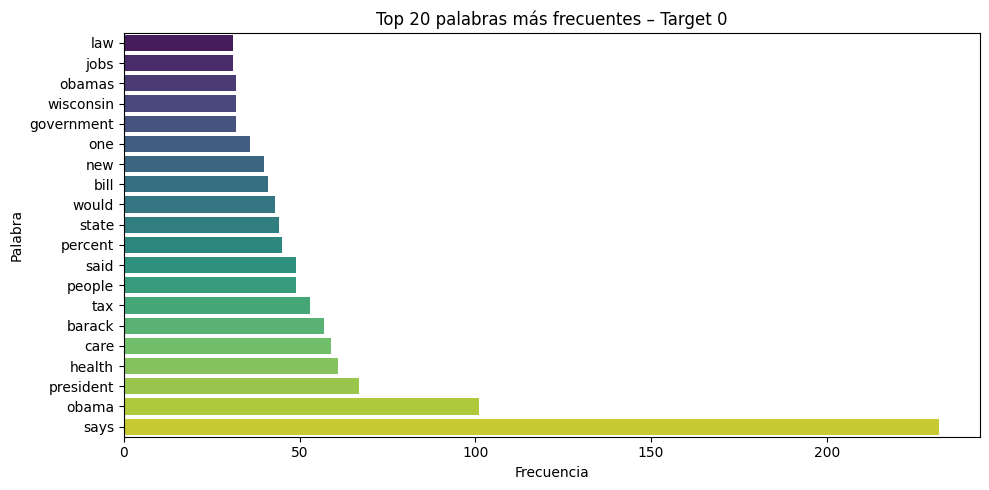


Mostrando top 20 palabras para Target: 1


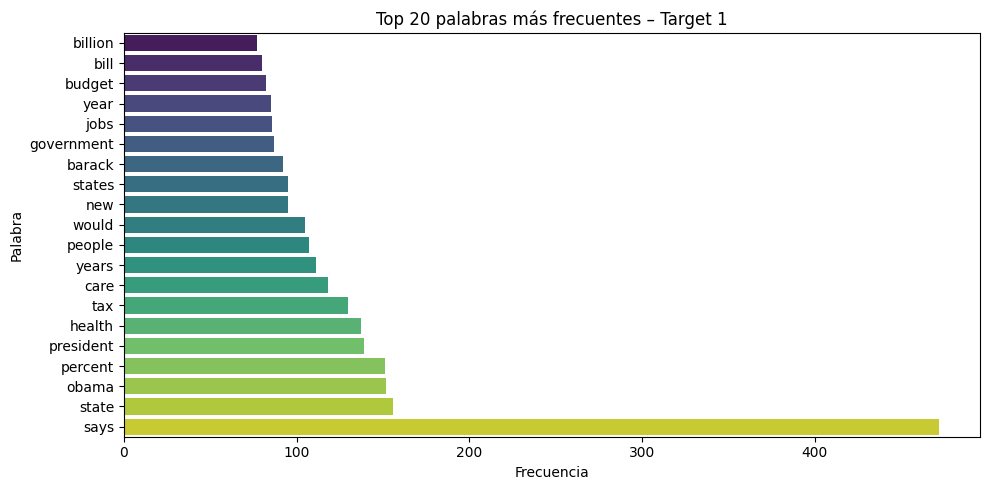


Mostrando top 20 palabras para Target: 2


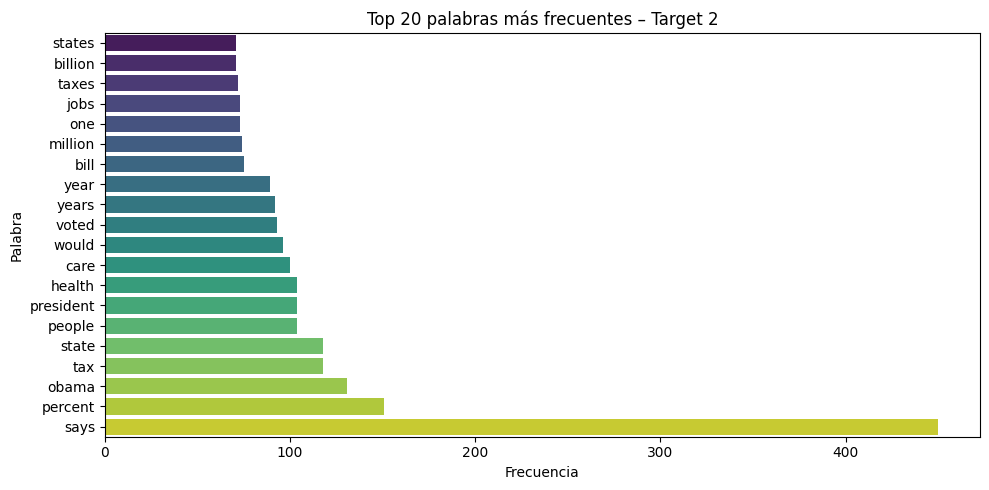


Mostrando top 20 palabras para Target: 3


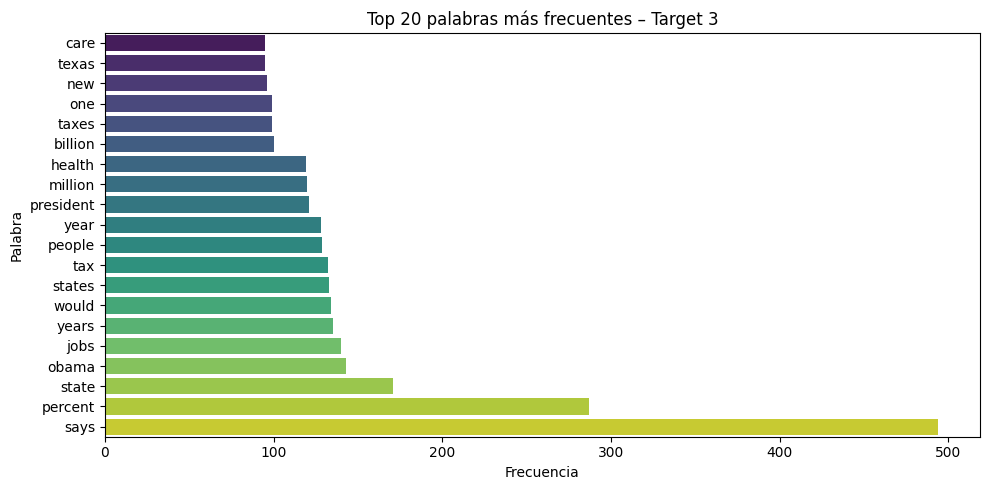


Mostrando top 20 palabras para Target: 4


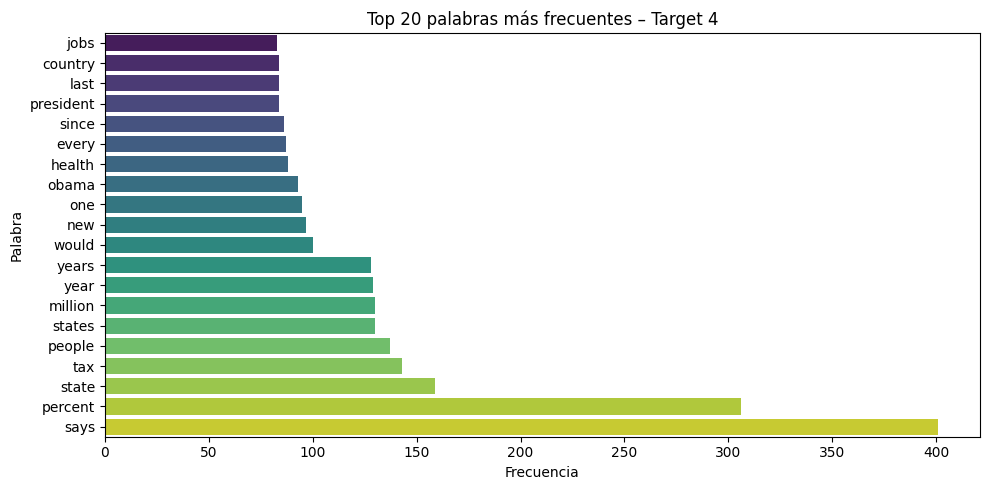


Mostrando top 20 palabras para Target: 5


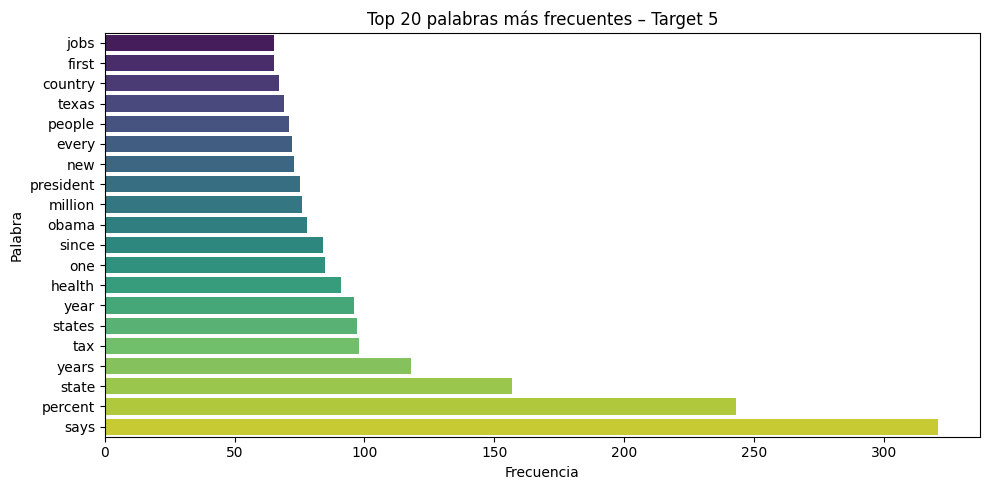

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords", quiet=True)
stop_words = set(stopwords.words("english"))

# Función para tokenizar
#Limpia minúsculas , stopwords, palabras muy cortas y caracteres especiales
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

# Estadísticas básicas
print(" INFORMACIÓN BÁSICA DEL DATASET ")
print(f"Número de instancias y variables: {train.shape}")
print("\nTipos de datos de cada columna:")
print(train.dtypes)
print("\nEstadísticas descriptivas de conteos de veracidad:")
count_cols = ["barely_true_counts","false_counts","half_true_counts",
              "mostly_false_counts","mostly_true_counts","pants_on_fire_counts"]
print(train[count_cols].describe())

print("\nVALORES NULOS POR COLUMNA")
print(train.isnull().sum())

#Distribución del target
print("\n HISTOGRAMA DEL TARGET ")
print("Visualización de la distribución de clases en la columna 'target'.")
plt.figure(figsize=(8,4))
sns.histplot(train["target"], bins=len(train["target"].unique()), kde=False)
plt.title("Distribución del target")
plt.xlabel("Target")
plt.ylabel("Número de instancias")
plt.show()

# Longitud de los textos
train["len"] = train["statement"].str.split().apply(len)

print("\nHISTOGRAMA DE LONGITUD DE LOS TEXTOS")
print("Muestra cuántas palabras tienen los statements.")
plt.figure(figsize=(6,4))
sns.histplot(train["len"], bins=50, kde=False)
plt.title("Distribución de longitudes de texto")
plt.xlabel("Número de palabras")
plt.ylabel("Número de instancias")
plt.show()

print("\n--- BOXPLOT DE LONGITUD DE TEXTOS POR TARGET ---")
print("Permite comparar la longitud de los statements según la clase del target.")
plt.figure(figsize=(10,5))
sns.boxplot(x="target", y="len", data=train)
plt.title("Longitud de los textos por target")
plt.xlabel("Target")
plt.ylabel("Número de palabras")
plt.show()

# Nube de palabras por target
print("\n--- NUBES DE PALABRAS POR TARGET ---")
print("Cada nube muestra las palabras más frecuentes para cada clase del target.")
for t in sorted(train["target"].unique()):
    texts = " ".join(train[train["target"] == t]["statement"])
    wc = WordCloud(width=1200, height=800, background_color="white").generate(texts)

    print(f"\nMostrando nube de palabras para Target: {t}")
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras – Target {t}")
    plt.show()

# Palabras más frecuentes por target
print("\n--- TOP 20 PALABRAS MÁS FRECUENTES POR TARGET ---")
print("Estos gráficos muestran las 20 palabras más repetidas por cada clase del target.")
for t in sorted(train["target"].unique()):
    subset = train[train["target"] == t]
    all_text = " ".join(subset["statement"].astype(str))
    tokens = tokenize(all_text)
    counter = Counter(tokens)
    top_words = counter.most_common(20)
    df_top = pd.DataFrame(top_words, columns=["word", "count"]).sort_values("count", ascending=True)

    print(f"\nMostrando top 20 palabras para Target: {t}")
    plt.figure(figsize=(10,5))
    sns.barplot(data=df_top, x="count", y="word", hue="word", palette="viridis", legend=False)
    plt.title(f"Top 20 palabras más frecuentes – Target {t}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")
    plt.tight_layout()
    plt.show()



*   True - valor 5 - la declaración es precisa
*   Mostly-true - valor 4 - la declaración contiene un elemento de verdad, pero puede faltarle contexto
*   Half-True - valor 3 - la declaración es parcialmente verdadera y parcilmente falsa
*   Barely-True - valor 2 - la declaración NO es precisa
*   Pants-Fire - valor 0 - la declaración es MUY falsa



Ridge + TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# TF-IDF
tfidf = TfidfVectorizer(
    max_features=15000,
    stop_words="english",
    ngram_range=(1,3),
    min_df=3,
    max_df=0.85,
    sublinear_tf=True,
    norm='l2'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# Ridge con validación
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42
)

# Buscar mejor alpha con validación simple
best_alpha = None
best_score = -np.inf

alphas = np.logspace(-2, 2, 10)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, solver='sparse_cg', max_iter=1000)
    ridge.fit(X_tr, y_tr)
    score = ridge.score(X_val, y_val)
    if score > best_score:
        best_score = score
        best_alpha = alpha

print(f"Mejor alpha encontrado: {best_alpha}")

# Modelo final
ridge_tfidf = Ridge(alpha=best_alpha, solver='sparse_cg', max_iter=1000)
ridge_tfidf.fit(X_train_tfidf, y_train)

pred_tfidf = ridge_tfidf.predict(X_test_tfidf)

# Resultados
print("\nTF-IDF OPTIMIZED RESULTS")
print("Mejor alpha:", best_alpha)
print("MSE:", mean_squared_error(y_test, pred_tfidf))
print("MAE:", mean_absolute_error(y_test, pred_tfidf))
print("R2:", r2_score(y_test, pred_tfidf))

Mejor alpha encontrado: 4.6415888336127775

TF-IDF OPTIMIZED RESULTS
Mejor alpha: 4.6415888336127775
MSE: 2.1982137915319497
MAE: 1.2484419173982007
R2: 0.0770291472371405


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 61.9 MB/s eta 0:00:00


Ridge + Word2Vec (promedio de embeddings) quedarse con el segundo q lo mejora bastante

In [ ]:
import re
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# 1. Tokenización
# Mantiene números y preserva palabras importantes

def improved_tokenize(text):
    text = text.lower()
    # Preservar números y letras y separar puntuación
    text = re.sub(r"([.,!?;:])", r" \1 ", text)
    text = re.sub(r"[^a-z0-9\s.,!?;:]", "", text)
    tokens = text.split()
    # Filtrar stopwords pero mantener tokens significativos
    tokens = [t for t in tokens if t and (len(t) > 2 or t.isdigit())]
    return tokens

print("Tokenizando textos...")
train_tokens = [improved_tokenize(str(text)) for text in X_train]
valid_tokens = [improved_tokenize(str(text)) for text in X_valid]
test_tokens = [improved_tokenize(str(text)) for text in X_test]


# 2. Promedio ponderado por TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Calcular TF-IDF para usar como pesos
tfidf_vectorizer = TfidfVectorizer(
    max_features=None,
    min_df=3,
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None
)

# Convertir tokens a strings para TfidfVectorizer
train_tokens_str = [' '.join(tokens) for tokens in train_tokens]
valid_tokens_str = [' '.join(tokens) for tokens in valid_tokens]
test_tokens_str = [' '.join(tokens) for tokens in test_tokens]

tfidf_vectorizer.fit(train_tokens_str)
feature_names = tfidf_vectorizer.get_feature_names_out()

def weighted_avg_w2v(tokens, model, tfidf_vec, vector_size=300):

    # Obtener pesos TF-IDF
    text_str = ' '.join(tokens)
    try:
        tfidf_scores = tfidf_vec.transform([text_str]).toarray()[0]
        feature_names = tfidf_vec.get_feature_names_out()
        word_to_tfidf = dict(zip(feature_names, tfidf_scores))
    except:
        word_to_tfidf = {}

    vectors = []
    weights = []

    for word in tokens:
        if word in model.wv:
            vectors.append(model.wv[word])
            weights.append(word_to_tfidf.get(word, 1.0))

    if len(vectors) == 0:
        return np.zeros(vector_size)

    vectors = np.array(vectors)
    weights = np.array(weights).reshape(-1, 1)

    # Promedio ponderado
    weighted_vectors = vectors * weights
    return np.sum(weighted_vectors, axis=0) / np.sum(weights)

# Ensemble de W2V

print("PROBANDO ENSEMBLE DE WORD2VEC")


configs = [
    {'vector_size': 200, 'window': 5, 'sg': 0, 'name': 'CBOW-200'},
    {'vector_size': 300, 'window': 10, 'sg': 1, 'name': 'SkipGram-300'},
    {'vector_size': 400, 'window': 7, 'sg': 1, 'name': 'SkipGram-400'},
]

predictions_train = []
predictions_test = []

for i, config in enumerate(configs, 1):
    name = config.pop('name')
    print(f"\n[{i}/3] Entrenando configuración: {name}")

    model = Word2Vec(
        sentences=train_tokens,
        min_count=3,
        workers=4,
        epochs=20,
        **config
    )

    vector_size = config['vector_size']

    # Generar embeddings
    X_tr = np.array([weighted_avg_w2v(t, model, tfidf_vectorizer, vector_size)
                     for t in train_tokens])
    X_te = np.array([weighted_avg_w2v(t, model, tfidf_vectorizer, vector_size)
                     for t in test_tokens])

    # Escalar
    scaler = StandardScaler()
    X_tr_sc = scaler.fit_transform(X_tr)
    X_te_sc = scaler.transform(X_te)

    # Entrenar Ridge
    ridge = Ridge(alpha=best_alpha)  # alpha ya optimizado
    ridge.fit(X_tr_sc, y_train)

    predictions_train.append(ridge.predict(X_tr_sc))
    predictions_test.append(ridge.predict(X_te_sc))

    # Mostrar resultado individual
    r2_individual = r2_score(y_test, predictions_test[-1])
    print(f"  R2 individual: {r2_individual:.4f}")

# Promedio de predicciones (ensemble simple)
final_pred_test = np.mean(predictions_test, axis=0)

mse_ensemble = mean_squared_error(y_test, final_pred_test)
mae_ensemble = mean_absolute_error(y_test, final_pred_test)
r2_ensemble = r2_score(y_test, final_pred_test)

print("\n===== ENSEMBLE W2V RESULTS =====")
print(f"MSE: {mse_ensemble:.4f}")
print(f"MAE: {mae_ensemble:.4f}")
print(f"R2: {r2_ensemble:.4f}")

Tokenizando textos...
PROBANDO ENSEMBLE DE WORD2VEC

[1/3] Entrenando configuración: CBOW-200
  R2 individual: 0.0622

[2/3] Entrenando configuración: SkipGram-300
  R2 individual: 0.0501

[3/3] Entrenando configuración: SkipGram-400
  R2 individual: 0.0575

===== ENSEMBLE W2V RESULTS =====
MSE: 2.2177
MAE: 1.2538
R2: 0.0688


3. Ridge + BERT embeddings (sin fine-tuning)

In [56]:
print("Generando embeddings ...")
X_train_bert = bert_model.encode(list(X_train), show_progress_bar=True)
X_test_bert  = bert_model.encode(list(X_test), show_progress_bar=True)

# 2. Escalar (normalizar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bert)
X_test_scaled  = scaler.transform(X_test_bert)

# 3. Verificar tamaños (deben ser 10269 train y 1283 test)
print(f"Tamaño X_train_scaled: {X_train_scaled.shape}")
print(f"Tamaño X_test_scaled: {X_test_scaled.shape}")
print(f"Tamaño y_test: {y_test.shape}")

# 4. Entrenar ridge y evaluar
alphas = np.logspace(-3, 3, 20)
ridge_bert = RidgeCV(alphas=alphas, scoring="r2")
ridge_bert.fit(X_train_scaled, y_train)

pred_bert = ridge_bert.predict(X_test_scaled)

# resultados
print("\n===== BERT EMBEDDINGS RESULTS (CORREGIDO) =====")
print("MSE:", mean_squared_error(y_test, pred_bert))
print("MAE:", mean_absolute_error(y_test, pred_bert))
print("R2:", r2_score(y_test, pred_bert))

Generando embeddings ...


Batches:   0%|          | 0/321 [00:00<?, ?it/s]

Batches:   0%|          | 0/41 [00:00<?, ?it/s]

Tamaño X_train_scaled: (10269, 384)
Tamaño X_test_scaled: (1283, 384)
Tamaño y_test: (1283,)

===== BERT EMBEDDINGS RESULTS (CORREGIDO) =====
MSE: 2.2014643650468573
MAE: 1.2568931107166257
R2: 0.07566431883847424


# RED NEURONAL EN PYTORCH


Red Neuronal + TF-IDF

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#COMPRESIÓN EXTREMA (sino MALOS resultados)
print("1. Generando TF-IDF y Comprimiendo a SOLO 50 componentes...")

# TF-IDF base
tfidf = TfidfVectorizer(max_features=2000, stop_words="english", ngram_range=(1,2))
X_train_sparse = tfidf.fit_transform(X_train)
X_test_sparse  = tfidf.transform(X_test)

# SVD a 50 componentes (cuello de botella extremo)
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_lsa = svd.fit_transform(X_train_sparse)
X_test_lsa  = svd.transform(X_test_sparse)

# Escalado
scaler = StandardScaler()
X_train_lsa = scaler.fit_transform(X_train_lsa)
X_test_lsa  = scaler.transform(X_test_lsa)

print(f"Dimensiones de entrada: {X_train_lsa.shape}")

#TENSORES
X_train_tensor = torch.tensor(X_train_lsa.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.astype(np.float32), dtype=torch.float32).unsqueeze(1)
X_test_tensor  = torch.tensor(X_test_lsa.astype(np.float32), dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values.astype(np.float32), dtype=torch.float32).unsqueeze(1)

# Batch size grande para gradientes más estables
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128, shuffle=False)

# RED NEURONAL
class MicroNN(nn.Module):
    def __init__(self, input_size):
        super(MicroNN, self).__init__()
        self.network = nn.Sequential(
            # Entrada 50 -> 16 (Muy pequeña)
            nn.Linear(input_size, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.6), # ¡Apagamos el 60% de las neuronas!

            # Salida directa
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.network(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MicroNN(input_size=50).to(device)
print(f"Modelo MicroNN cargado en: {device}")

# ENTRENAMIENTO FUERTEMENTE REGULARIZADO
criterion = nn.MSELoss()
# weight_decay muy alto (0.05) para forzar pesos pequeños
optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=0.05)

EPOCHS = 30

print("\nIniciando entrenamiento")
model.train()
for epoch in range(EPOCHS):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
    model.train()

    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {running_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(test_loader):.4f}")

# EVALUACIÓN
model.eval()
predictions, actuals = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy().flatten())
        actuals.extend(labels.numpy().flatten())

mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print("\nRESULTADO FINAL (TF-IDF + MicroNN)")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

1. Generando TF-IDF y Comprimiendo a SOLO 50 componentes...
Dimensiones de entrada: (10269, 50)
Modelo MicroNN cargado en: cuda

Iniciando entrenamiento
Epoch 5/30 | Train Loss: 2.9979 | Val Loss: 2.2668
Epoch 10/30 | Train Loss: 2.5865 | Val Loss: 2.2256
Epoch 15/30 | Train Loss: 2.4939 | Val Loss: 2.1891
Epoch 20/30 | Train Loss: 2.4004 | Val Loss: 2.1822
Epoch 25/30 | Train Loss: 2.3870 | Val Loss: 2.1881
Epoch 30/30 | Train Loss: 2.3651 | Val Loss: 2.1935

RESULTADO FINAL (TF-IDF + MicroNN)
MSE: 2.2861
R2: 0.0401


Red Neuronal + Word2Vec

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#GENERAR FEATURES (Configuración SkipGram-300)
print("Generando embeddings Word2Vec para la Red Neuronal...")

w2v_model_nn = Word2Vec(
    sentences=train_tokens,
    vector_size=300,
    window=10,
    min_count=3,
    workers=4,
    epochs=20,
    sg=1
)

# Generar vectores promedio ponderados por TF-IDF
X_train_w2v = np.array([weighted_avg_w2v(t, w2v_model_nn, tfidf_vectorizer, 300) for t in train_tokens])
X_test_w2v  = np.array([weighted_avg_w2v(t, w2v_model_nn, tfidf_vectorizer, 300) for t in test_tokens])

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_w2v)
X_test_scaled  = scaler.transform(X_test_w2v)

print(f"Dimensiones de entrada: {X_train_scaled.shape}")

# PREPARAR PYTORCH
# Convertir a Tensores
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.astype(np.float32), dtype=torch.float32).unsqueeze(1)
X_test_tensor  = torch.tensor(X_test_scaled.astype(np.float32), dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values.astype(np.float32), dtype=torch.float32).unsqueeze(1)

# DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=BATCH_SIZE, shuffle=False)

# ARQUITECTURA DE LA RED
class W2V_NN(nn.Module):
    def __init__(self, input_size):
        super(W2V_NN, self).__init__()
        self.network = nn.Sequential(
            # Entrada 300 -> 128
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128), # Estabilidad
            nn.ReLU(),
            nn.Dropout(0.3),# Regularización

            # 128 -> 64
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            # Salida (Regresión)
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = W2V_NN(input_size=300).to(device)
print(f"Modelo W2V-NN cargado en: {device}")

# ENTRENAMIENTO
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.001)
EPOCHS = 30

print("\nIniciando entrenamiento Word2Vec NN")
model.train()
best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(EPOCHS):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validación simple
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
    model.train()

    avg_train = running_loss/len(train_loader)
    avg_val = val_loss/len(test_loader)

    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train:.4f} | Val Loss: {avg_val:.4f}")

    # Early Stopping básico
    if avg_val < best_loss:
        best_loss = avg_val
        torch.save(model.state_dict(), 'best_w2v_model.pth')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early Stopping activado.")
            break

# EVALUACIÓN
model.load_state_dict(torch.load('best_w2v_model.pth', weights_only=True))
model.eval()
predictions, actuals = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy().flatten())
        actuals.extend(labels.numpy().flatten())

mse_nn = mean_squared_error(actuals, predictions)
mae_nn = mean_absolute_error(actuals, predictions)
r2_nn = r2_score(actuals, predictions)

print("\nPYTORCH NN (Word2Vec) RESULTS ")
print(f"MSE: {mse_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")
print(f"R2: {r2_nn:.4f}")

Generando embeddings Word2Vec para la Red Neuronal...
Dimensiones de entrada: (10269, 300)
Modelo W2V-NN cargado en: cuda

 Iniciando entrenamiento Word2Vec NN
Epoch 5/30 | Train Loss: 2.1967 | Val Loss: 2.3150
Epoch 10/30 | Train Loss: 2.0194 | Val Loss: 2.3449
Early Stopping activado.

 PYTORCH NN (Word2Vec) RESULTS 
MSE: 2.3099
MAE: 1.2746
R2: 0.0301


Red Neuronal + BERT embeddings

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# PREPARAR DATOS
print(f"Usando embeddings de BERT: {X_train_scaled.shape}")

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.astype(np.float32), dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.astype(np.float32), dtype=torch.float32).unsqueeze(1)

# Crear dataLoaders (Batch size 32)
BATCH_SIZE = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=BATCH_SIZE, shuffle=False)

# ARQUITECTURA (BERT-MLP)
class BERT_NN(nn.Module):
    def __init__(self, input_size):
        super(BERT_NN, self).__init__()

        self.network = nn.Sequential(
            # Capa 1: Entrada (384) -> 256
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256), # Normalización por lotes para estabilidad
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout para evitar overfitting

            # Capa 2: 256 -> 64
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            # Salida: 64 -> 1
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

# Inicializar modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_scaled.shape[1] # Debería ser 384 (si usaste MiniLM) o 768
model = BERT_NN(input_dim).to(device)
print(f"Modelo BERT-NN cargado en: {device}")

# ENTRENAMIENTO
criterion = nn.MSELoss()
# AdamW suele funcionar mejor que Adam estándar para embeddings
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

EPOCHS = 25
best_loss = float('inf')
patience = 5
counter = 0

print("\nIniciando entrenamiento BERT NN")
model.train()
for epoch in range(EPOCHS):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validación (Test set)
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
    model.train()

    avg_train = running_loss / len(train_loader)
    avg_val = val_loss / len(test_loader)

    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train:.4f} | Val Loss: {avg_val:.4f}")

    # Early Stopping
    if avg_val < best_loss:
        best_loss = avg_val
        torch.save(model.state_dict(), 'best_bert_nn.pth')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Deteniendo por Early Stopping.")
            break

# EVALUACIÓN FINAL
model.load_state_dict(torch.load('best_bert_nn.pth', weights_only=True))
model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy().flatten())
        actuals.extend(labels.numpy().flatten())

mse_nn = mean_squared_error(actuals, predictions)
mae_nn = mean_absolute_error(actuals, predictions)
r2_nn = r2_score(actuals, predictions)

print("\nPYTORCH NN (BERT Embeddings) RESULTS")
print(f"MSE: {mse_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")
print(f"R2: {r2_nn:.4f}")

Usando embeddings de BERT: (10269, 300)
Modelo BERT-NN cargado en: cuda

Iniciando entrenamiento BERT NN
Epoch 5/25 | Train Loss: 2.1443 | Val Loss: 2.2678
Epoch 10/25 | Train Loss: 1.9332 | Val Loss: 2.3428
Deteniendo por Early Stopping.

PYTORCH NN (BERT Embeddings) RESULTS
MSE: 2.2789
MAE: 1.2628
R2: 0.0432


In [84]:
!pip install -q transformers datasets evaluate accelerate

import torch
import numpy as np
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# PREPARACIÓN DE DATOS
# Creamos un DataFrame temporal
df_train = pd.DataFrame({"text": X_train, "label": y_train})
df_valid = pd.DataFrame({"text": X_valid, "label": y_valid})
df_test  = pd.DataFrame({"text": X_test,  "label": y_test})

# Convertimos a formato Dataset de HF
dataset_train = Dataset.from_pandas(df_train)
dataset_valid = Dataset.from_pandas(df_valid)
dataset_test  = Dataset.from_pandas(df_test)

# Tokenización
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

tokenized_train = dataset_train.map(tokenize_function, batched=True)
tokenized_valid = dataset_valid.map(tokenize_function, batched=True)
tokenized_test  = dataset_test.map(tokenize_function, batched=True)

# Preparamos formato para PyTorch (labels deben ser float para regresión)
tokenized_train = tokenized_train.map(lambda x: {"labels": float(x["label"])})
tokenized_valid = tokenized_valid.map(lambda x: {"labels": float(x["label"])})
tokenized_test  = tokenized_test.map(lambda x: {"labels": float(x["label"])})

# Eliminamos columnas innecesarias
cols_to_remove = ["text", "label", "__index_level_0__"]
tokenized_train = tokenized_train.remove_columns([c for c in cols_to_remove if c in tokenized_train.column_names])
tokenized_valid = tokenized_valid.remove_columns([c for c in cols_to_remove if c in tokenized_valid.column_names])
tokenized_test  = tokenized_test.remove_columns([c for c in cols_to_remove if c in tokenized_test.column_names])

tokenized_train.set_format("torch")
tokenized_valid.set_format("torch")
tokenized_test.set_format("torch")

#MODELO
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=1)

#MÉTRICAS
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions[:, 0]

    mse = mean_squared_error(labels, predictions)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)

    return {"mse": mse, "mae": mae, "r2": r2}

#ENTRENAMIENTO
training_args = TrainingArguments(
    output_dir="./bert_finetuned_regression",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="mse",
    greater_is_better=False,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    compute_metrics=compute_metrics,
)

print("Iniciando Fine-Tuning de BERT (Regresión)...")
trainer.train()

# EVALUACIÓN FINAL
print("\nEvaluando en TEST...")
results = trainer.predict(tokenized_test)

print("\nFINE-TUNED BERT RESULTS (Comparable con anteriores)")
print(f"MSE: {results.metrics['test_mse']:.4f}")
print(f"MAE: {results.metrics['test_mae']:.4f}")
print(f"R2:  {results.metrics['test_r2']:.4f}")

Map:   0%|          | 0/10269 [00:00<?, ? examples/s]

Map:   0%|          | 0/1284 [00:00<?, ? examples/s]

Map:   0%|          | 0/1283 [00:00<?, ? examples/s]

Map:   0%|          | 0/10269 [00:00<?, ? examples/s]

Map:   0%|          | 0/1284 [00:00<?, ? examples/s]

Map:   0%|          | 0/1283 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Iniciando Fine-Tuning de BERT (Regresión)...


Epoch,Training Loss,Validation Loss,Mse,Mae,R2
1,2.490400,2.272965,2.272965,1.269590,0.042423
2,2.071700,2.002752,2.002752,1.179194,0.156262
3,1.810700,2.247485,2.247485,1.215814,0.053158



Evaluando en TEST...



FINE-TUNED BERT RESULTS (Comparable con anteriores)
MSE: 2.1362
MAE: 1.2210
R2:  0.1031


PROYECTO DE EXTENSIÓN (ANÁLISIS CORRELACIONAL DE POLARIZACIÓN +0.75 PTOS)

/tmp/ipython-input-3751591119.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


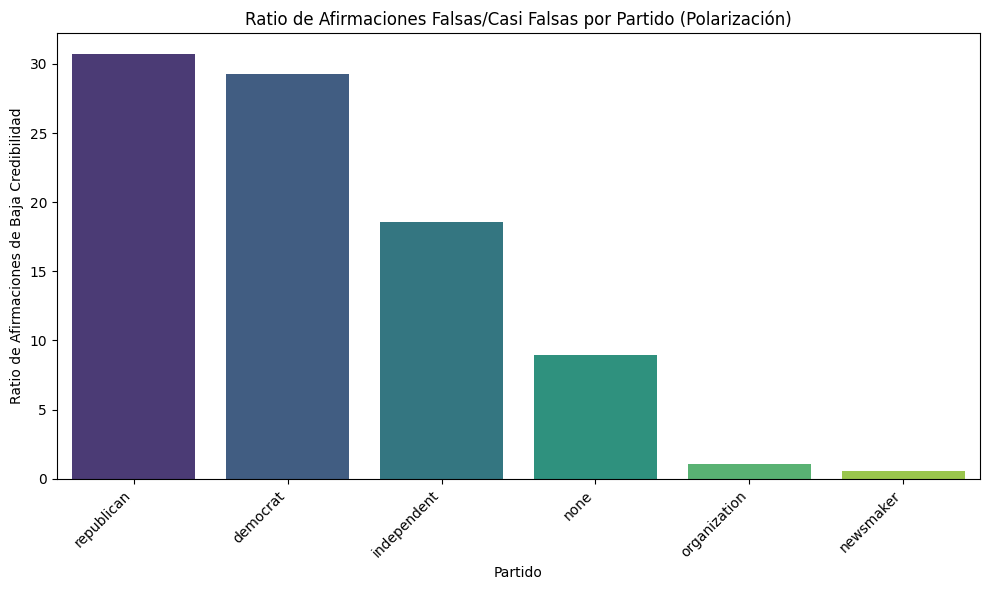

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# LIMPIEZA PREVIA ESPECÍFICA PARA LA EXTENSIÓN
# Aseguramos que las columnas de conteo sean números.
# 'coerce' convierte cualquier texto raro en NaN, y fillna(0) lo pone a cero.
cols_to_fix = ['false_counts', 'barely_true_counts', 'pants_on_fire_counts']

for col in cols_to_fix:
    train[col] = pd.to_numeric(train[col], errors='coerce').fillna(0)

# AGRUPACIÓN Y CÁLCULO
train_party_stats = train.groupby('party').agg(
    total_statements=('id', 'count'),
    false_counts=('false_counts', 'sum'),
    barely_true_counts=('barely_true_counts', 'sum'),
    pants_on_fire_counts=('pants_on_fire_counts', 'sum'),
).reset_index()

# CÁLCULO DEL RATIO
train_party_stats['fake_ratio'] = (
    train_party_stats['false_counts'] +
    train_party_stats['barely_true_counts'] +
    train_party_stats['pants_on_fire_counts']
) / train_party_stats['total_statements']

# VISUALIZACIÓN
plt.figure(figsize=(10, 6))
# Filtramos partidos con más de 50 declaraciones para evitar ruido
df_plot = train_party_stats[train_party_stats['total_statements'] > 50].sort_values('fake_ratio', ascending=False)

sns.barplot(
    x='party',
    y='fake_ratio',
    data=df_plot,
    palette='viridis' # Añadí una paleta de colores para que se vea mejor
)
plt.title("Ratio de Afirmaciones Falsas/Casi Falsas por Partido (Polarización)")
plt.ylabel("Ratio de Afirmaciones de Baja Credibilidad")
plt.xlabel("Partido")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()